In [1]:
# Mount Drive
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_dir = '/content/drive/Shareddrives/CAPSTONE C23-PS061/Dataset Split'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['Kardus', 'Kaca (White & Green)', 'Plastik', 'Kertas', 'Logam', 'Organik', 'Botol Plastik', 'Botol Kaca']

Contents of validation directory:
['Kardus', 'Kaca (White & Green)', 'Plastik', 'Kertas', 'Logam', 'Organik', 'Botol Plastik', 'Botol Kaca']


In [3]:
# Import train_dir & validation_dir
train_dir = f'{base_dir}/train'
validation_dir = f'{base_dir}/validation'

# Print the number of files in each class for train and validation
print("Number of files in each class (train):")
for class_folder in os.listdir(train_dir):
    class_folder_path = os.path.join(train_dir, class_folder)
    num_files = len(os.listdir(class_folder_path))
    print(f"{class_folder}: {num_files} files")

print("\nNumber of files in each class (validation):")
for class_folder in os.listdir(validation_dir):
    class_folder_path = os.path.join(validation_dir, class_folder)
    num_files = len(os.listdir(class_folder_path))
    print(f"{class_folder}: {num_files} files")


Number of files in each class (train):
Kardus: 623 files
Kaca (White & Green): 560 files
Plastik: 691 files
Kertas: 751 files
Logam: 538 files
Organik: 696 files
Botol Plastik: 700 files
Botol Kaca: 698 files

Number of files in each class (validation):
Kardus: 268 files
Kaca (White & Green): 241 files
Plastik: 304 files
Kertas: 322 files
Logam: 231 files
Organik: 299 files
Botol Plastik: 300 files
Botol Kaca: 300 files


In [4]:
import tensorflow as tf

# Menentukan dimensi gambar dan jumlah kelas
image_width = 300
image_height = 300
num_classes = 8

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pra-pemrosesan dan augmentasi gambar menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,  # Skala ulang intensitas pixel menjadi rentang 0-1
                                   rotation_range=20,  # Rotasi acak gambar dalam rentang 0-20 derajat
                                   width_shift_range=0.2,  # Pergeseran horizontal acak pada gambar
                                   height_shift_range=0.2,  # Pergeseran vertikal acak pada gambar
                                   horizontal_flip=True,  # Flip horizontal acak pada gambar
                                   )  

validation_datagen = ImageDataGenerator(rescale=1./255)  # Skala ulang intensitas pixel gambar validasi

# Menggunakan ImageDataGenerator untuk memuat dan mempersiapkan data latihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

# Menggunakan ImageDataGenerator untuk memuat dan mempersiapkan data validasi
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

Found 5257 images belonging to 8 classes.
Found 2265 images belonging to 8 classes.


In [6]:
# Membangun model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [7]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Melatih model menggunakan data latihan dan validasi
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)


Epoch 1/20
164/164 [==============================] - 3682s 22s/step - loss: 1.6440 - accuracy: 0.3761 - val_loss: 1.4028 - val_accuracy: 0.4906
Epoch 2/20
164/164 [==============================] - 151s 924ms/step - loss: 1.2612 - accuracy: 0.5504 - val_loss: 1.1586 - val_accuracy: 0.5759
Epoch 3/20
164/164 [==============================] - 153s 933ms/step - loss: 1.1500 - accuracy: 0.5897 - val_loss: 0.9532 - val_accuracy: 0.6554
Epoch 4/20
164/164 [==============================] - 160s 978ms/step - loss: 1.0080 - accuracy: 0.6459 - val_loss: 0.8845 - val_accuracy: 0.7000
Epoch 5/20
164/164 [==============================] - 150s 914ms/step - loss: 0.9540 - accuracy: 0.6731 - val_loss: 0.8720 - val_accuracy: 0.6964
Epoch 6/20
164/164 [==============================] - 162s 989ms/step - loss: 0.8857 - accuracy: 0.6953 - val_loss: 0.8490 - val_accuracy: 0.7080
Epoch 7/20
164/164 [==============================] - 161s 985ms/step - loss: 0.8041 - accuracy: 0.7240 - val_loss: 0.6669 - 

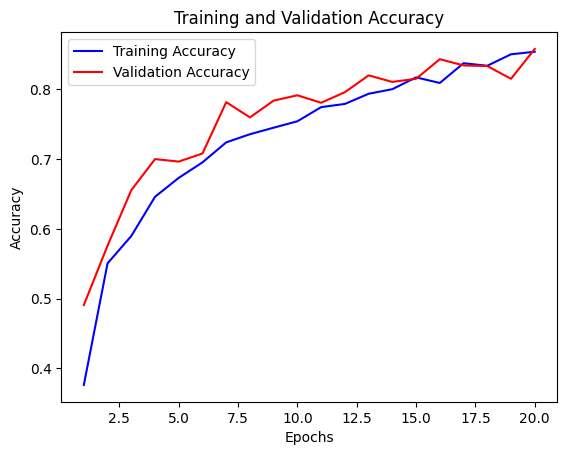

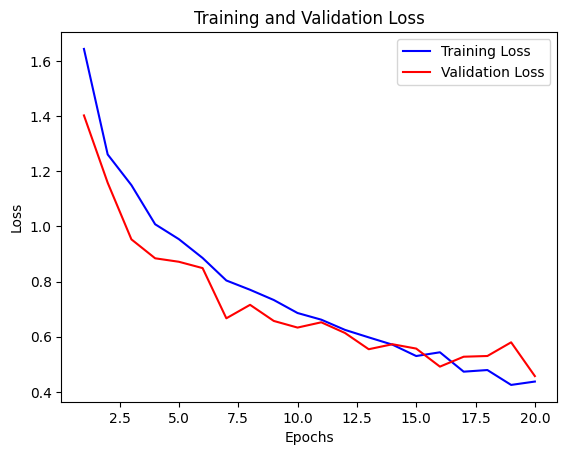

In [11]:
import matplotlib.pyplot as plt

# Mengambil nilai akurasi dan loss dari objek history
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Menghitung jumlah epoch
epochs = range(1, len(accuracy) + 1)

# Plot akurasi training dan validation
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss training
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
# Menyimpan model
model.save('/content/drive/Shareddrives/CAPSTONE C23-PS061/Model/model5xConvolutionalwithAugmentasi.h5')